In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# csv-Datei gelesen, Einträge mit "NaN" sollen als fehlend behandelt werden

df = pd.read_csv("Geburtsgewicht_2014.csv", na_values=["NaN"]) 

# Spaltenüberschrift geändert

df.columns = [
                "Alter des Vaters", 
                "Alter der Mutter",
                "Risikoschwangerschaft", 
                "Schwangerschaftsdauer [Wochen]",
                "Frühgeburt",
                "Krankenhausbesuche",
                "Gewichtszunahme Mutter",
                "Geburtsgewicht Kind",
                "Untergewicht",
                "Geschlecht Kind",
                "Mutter raucht",
                "Beziehungsstatus",
                "Hautfarbe"]  

# Löscht alle Zeilen, die einen fehlenden Eintrag ("NaN") enthalten

df_clean = df.dropna().copy() 

# Pfund in Kilogramm

df_clean["Gewichtszunahme Mutter"] = df_clean["Gewichtszunahme Mutter"] * 0.453592
df_clean["Geburtsgewicht Kind"] = df_clean["Geburtsgewicht Kind"] * 0.453592

# float zu int

df_clean["Alter des Vaters"] = df_clean["Alter des Vaters"].round().astype(int) 
df_clean["Krankenhausbesuche"] = df_clean["Krankenhausbesuche"].round().astype(int)
df_clean["Gewichtszunahme Mutter"] = df_clean["Gewichtszunahme Mutter"].round().astype(int)

# Runden

df_clean["Geburtsgewicht Kind"] = df_clean["Geburtsgewicht Kind"].round(3)

# Begriffe ersetzen

df_clean["Risikoschwangerschaft"] = df_clean["Risikoschwangerschaft"].replace({
    "younger mom": 0,
    "mature mom": 1
})

df_clean["Frühgeburt"] = df_clean["Frühgeburt"].replace({
    "full term": 0,
    "premie": 1
})

df_clean["Untergewicht"] = df_clean["Untergewicht"].replace({
    "not low": 0,
    "low": 1
})

df_clean["Geschlecht Kind"] = df_clean["Geschlecht Kind"].replace({
    "female": "weiblich",
    "male": "männlich"
})

df_clean["Mutter raucht"] = df_clean["Mutter raucht"].replace({
    "nonsmoker": 0,
    "smoker": 1
})

df_clean["Beziehungsstatus"] = df_clean["Beziehungsstatus"].replace({
    "married": "verheiratet",
    "not married": "ledig"
})

df_clean["Hautfarbe"] = df_clean["Hautfarbe"].replace({
    "white": "weiß",
    "not white": "nicht weiß"
})

df_clean

/var/folders/73/ybmxxnp53sv8y7c8r9bf8hfc0000gn/T/ipykernel_74212/638410812.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean["Risikoschwangerschaft"] = df_clean["Risikoschwangerschaft"].replace({
/var/folders/73/ybmxxnp53sv8y7c8r9bf8hfc0000gn/T/ipykernel_74212/638410812.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean["Frühgeburt"] = df_clean["Frühgeburt"].replace({
/var/folders/73/ybmxxnp53sv8y7c8r9bf8hfc0000gn/T/ipykernel_74212/638410812.py:58: FutureWarning: Downcasting behavior in `replace` is deprecat

,Alter des Vaters,Alter der Mutter,Risikoschwangerschaft,Schwangerschaftsdauer [Wochen],Frühgeburt,Krankenhausbesuche,Gewichtszunahme Mutter,Geburtsgewicht Kind,Untergewicht,Geschlecht Kind,Mutter raucht,Beziehungsstatus,Hautfarbe
0,34,34,0,37,0,14,13,3.157,0,männlich,0,verheiratet,weiß
1,36,31,0,41,0,12,19,4.019,0,weiblich,0,verheiratet,weiß
2,37,36,1,37,0,10,13,3.406,0,weiblich,0,verheiratet,nicht weiß
4,32,31,0,36,1,12,22,3.062,0,weiblich,0,verheiratet,weiß
5,32,26,0,39,0,14,20,3.035,0,weiblich,0,verheiratet,weiß
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,48,32,0,40,0,8,4,4.082,0,weiblich,0,verheiratet,nicht weiß
994,29,24,0,32,1,8,15,1.057,1,weiblich,0,verheiratet,weiß
996,37,31,0,38,0,8,15,2.631,0,weiblich,0,verheiratet,weiß
997,27,27,0,34,1,7,11,3.062,0,weiblich,0,verheiratet,weiß


In [3]:
# 1. Wie hoch ist das durchschnittliche Geburtsgewicht?

durchschnitt = float(round(df_clean["Geburtsgewicht Kind"].mean(), 3))
print(f"Durchschnittliches Geburtsgewicht: {durchschnitt} g")

median = float(round(df_clean["Geburtsgewicht Kind"].median(), 3))
print(f"Median: {median} g")

Durchschnittliches Geburtsgewicht: 3.288 g
Median: 3.327 g


In [6]:
# 2. Was ist das kleinste und was das größte Geburtsgewicht?

maximum = float(round(df_clean["Geburtsgewicht Kind"].max(), 3))
print(f"Maximales Geburtsgewicht: {maximum} g")

minimum = float(round(df_clean["Geburtsgewicht Kind"].min(), 3))
print(f"Minimales Geburtsgewicht: {minimum} g")

Maximales Geburtsgewicht: 4.726 g
Minimales Geburtsgewicht: 0.508 g


Mutter raucht
0    732
1     62
Name: count, dtype: int64


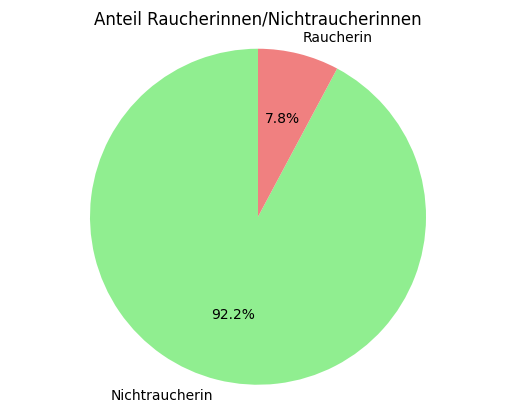

In [7]:
# 3. Wie viele Mütter rauchen? Stelle dies in einem Kreisdiagramm dar.

df_clean["Mutter raucht"].value_counts()

import matplotlib.pyplot as plt

# Zähle, wie viele Mütter rauchen oder nicht rauchen

anzahl_1 = df_clean["Mutter raucht"].value_counts()
print(anzahl_1)

# Beschriftung: Reihenfolge muss zur Zählung passen

labels = ["Nichtraucherin", "Raucherin"]  

# Farben

farben = ["lightgreen", "lightcoral"]

# Kreisdiagramm zeichnen

plt.pie(anzahl_1, labels=labels, colors=farben, autopct="%1.1f%%", startangle=90)
plt.title("Anteil Raucherinnen/Nichtraucherinnen")
plt.axis("equal")  # Macht den Kreis wirklich rund
plt.show()

In [8]:
# 4. Wie viele Frühgeburten gab es?

anzahl_2 = df_clean["Frühgeburt"].value_counts()
print(anzahl_2)

Frühgeburt
0    696
1     98
Name: count, dtype: int64


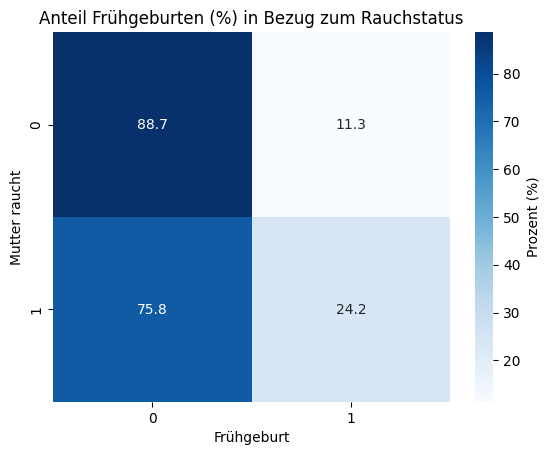

In [9]:
# 5. Gibt es einen Zusammenhang zwischen den Frühgeburten und dem Rauchstatus?

# Kreuztabelle mit Anteilen pro Zeile

kreuz_rel = pd.crosstab(
    df_clean["Mutter raucht"],
    df_clean["Frühgeburt"],
    normalize="index"  # pro Zeile (jede 'Mutter raucht'-Gruppe)
)

# Dezimalzahlen (0.25) → Prozentwerte (25.0)

kreuz_percent = kreuz_rel * 100

# Heatmap zeichnen mit Prozentwerten

sns.heatmap(kreuz_percent, annot=True, fmt=".1f", cmap="Blues",
            cbar_kws={'label': 'Prozent (%)'})

plt.title("Anteil Frühgeburten (%) in Bezug zum Rauchstatus")
plt.xlabel("Frühgeburt")
plt.ylabel("Mutter raucht")
plt.show()

In [10]:
# 6. Gibt es einen Zusammenhang zwischen dem Geburtsgewicht des Kindes und dem Rauchstatus?

fig = px.box(
    df_clean,
    x="Mutter raucht",
    y="Geburtsgewicht Kind",
    color="Mutter raucht",  # Farbe basiert auf dieser Spalte
    color_discrete_map={"Nein": "green", "Ja": "red"},  # → individuelle Farben
    points="all",  # zeigt auch alle Einzelpunkte
    title="Geburtsgewicht nach Rauchverhalten der Mutter",
    labels={
        "Mutter raucht": "Mutter raucht?",
        "Geburtsgewicht Kind": "Geburtsgewicht des Kindes in Gramm"
    }
)

fig.update_traces(hovertemplate="Rauchstatus: %{x}<br>Gewicht: %{y} g")
fig.show()

In [11]:
# 7. Gibt es einen Zusammenhang zwischen der Anzahl der Krankenhausbesuche und der Frühgeburten?

fig = px.box(
    df_clean,
    x="Frühgeburt",
    y="Krankenhausbesuche",
    color="Frühgeburt",  # Farbe basiert auf dieser Spalte
    color_discrete_map={"Nein": "green", "Ja": "red"},  # → individuelle Farben
    points="all",  # zeigt auch alle Einzelpunkte
    title="Zusammenhang zwischen der Anzahl der Krankenhausbesuche und der Frühgeburten",
    labels={
        "Frühgeburt": "Frühgeburt?",
        "Krankenhausbesuche": "Anzahl der Krankenhausbesuche"
    }
)

fig.update_traces(hovertemplate="Frühgeburt: %{x}<br>Krankenhausbesuche: %{y} g")
fig.show()

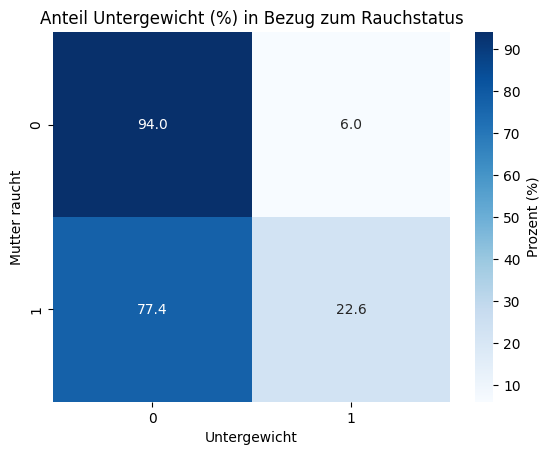

,Mutter raucht,Untergewicht
Mutter raucht,1.000000,0.170849
Untergewicht,0.170849,1.000000


In [18]:
# 8. Gibt es einen Zusammenhang zwischen Untergewicht und dem Rauchstatus?

# Kreuztabelle mit Anteilen pro Zeile

kreuz_rel = pd.crosstab(
    df_clean["Mutter raucht"],
    df_clean["Untergewicht"],
    normalize="index"  # pro Zeile (jede 'Mutter raucht'-Gruppe)
)

# Dezimalzahlen (0.25) → Prozentwerte (25.0)

kreuz_percent = kreuz_rel * 100

# Heatmap zeichnen mit Prozentwerten

sns.heatmap(kreuz_percent, annot=True, fmt=".1f", cmap="Blues",
            cbar_kws={'label': 'Prozent (%)'})

plt.title("Anteil Untergewicht (%) in Bezug zum Rauchstatus")
plt.xlabel("Untergewicht")
plt.ylabel("Mutter raucht")
plt.show()

# Korrelation

df_clean[["Mutter raucht", "Untergewicht"]].corr()

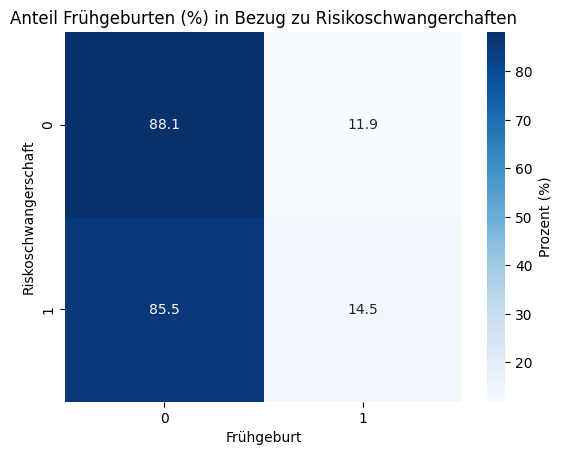

,Frühgeburt,Risikoschwangerschaft
Frühgeburt,1.000000,0.029207
Risikoschwangerschaft,0.029207,1.000000


In [17]:
# 9. Gibt es einen Zusammenhang zwischen Riskoschwangerschaften und einer Frühgeburt?

import seaborn as sns

# Kreuztabelle mit Anteilen pro Zeile

kreuz_rel = pd.crosstab(
    df_clean["Risikoschwangerschaft"],
    df_clean["Frühgeburt"],
    normalize="index"  # pro Zeile (jede 'Mutter raucht'-Gruppe)
)

# Dezimalzahlen (0.25) → Prozentwerte (25.0)

kreuz_percent = kreuz_rel * 100

# Heatmap zeichnen mit Prozentwerten

sns.heatmap(kreuz_percent, annot=True, fmt=".1f", cmap="Blues",
            cbar_kws={'label': 'Prozent (%)'})

plt.title("Anteil Frühgeburten (%) in Bezug zu Risikoschwangerchaften")
plt.xlabel("Frühgeburt")
plt.ylabel("Riskoschwangerschaft")
plt.show()

# Korrelation?

df_clean[["Frühgeburt", "Risikoschwangerschaft"]].corr()

In [14]:
df_clean["Altersunterschied"] = abs(df["Alter der Mutter"] - df["Alter des Vaters"])

df_clean.loc[df_clean["Altersunterschied"].idxmax()]

Alter des Vaters                        85
Alter der Mutter                        29
Risikoschwangerschaft                    0
Schwangerschaftsdauer [Wochen]          35
Frühgeburt                               1
Krankenhausbesuche                       8
Gewichtszunahme Mutter                  21
Geburtsgewicht Kind                  2.699
Untergewicht                             0
Geschlecht Kind                   weiblich
Mutter raucht                            1
Beziehungsstatus                     ledig
Hautfarbe                             weiß
Altersunterschied                     56.0
Name: 435, dtype: object

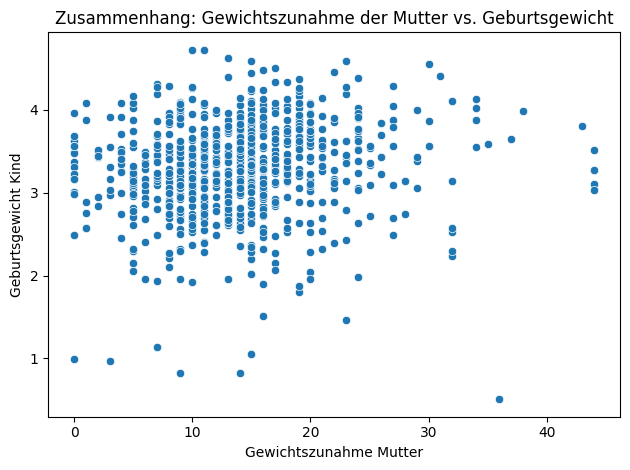

,Gewichtszunahme Mutter,Geburtsgewicht Kind
Gewichtszunahme Mutter,1.000000,0.120355
Geburtsgewicht Kind,0.120355,1.000000


In [15]:
# Werden Babys schwerer, je mehr Gewicht die Mutter in der Schwangerschaft zunimmt?

import matplotlib.pyplot as plt

# Streudiagramm zeichnen
sns.scatterplot(data=df_clean, x="Gewichtszunahme Mutter", y="Geburtsgewicht Kind")

# Achsenbeschriftung und Titel
plt.xlabel("Gewichtszunahme Mutter")
plt.ylabel("Geburtsgewicht Kind")
plt.title("Zusammenhang: Gewichtszunahme der Mutter vs. Geburtsgewicht")
plt.tight_layout()
plt.show()

df_clean[["Gewichtszunahme Mutter", "Geburtsgewicht Kind"]].corr()